### Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import scipy.interpolate as interp
from numpy.polynomial.polynomial import Polynomial

In [2]:
# Conding the Newton's method: 
x = np.array([-8,-5,-1,0,2,4])
y = np.array([-4,-2,6,1,3,5])

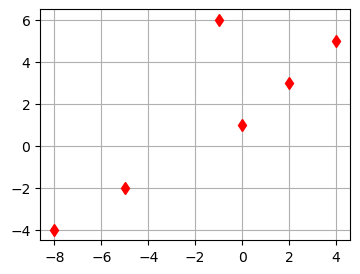

In [3]:
#ploting: 

plt.figure(figsize=(4,3))
plt.plot(x,y,marker = "d", color = 'red', linestyle = ' ')
plt.grid()
plt.show()

In [4]:
#Construction of the interpolation: 

def div_diff(x_values,y_values):
    '''
    Function that computes the divided difference
    INPUT: Data vectors
    OUTPUT: Coefficients
    '''
    n = len(x_values)
    
    #creating an empty arrray to save the coefficients 
    a_coef = np.zeros([n,n])
    
    #first we place the y_values in the first columm: 
    a_coef[:,0]= y_values
    
    #constructing the tree: 
    for j in range (1,n):
        for i in range (n-j):
            
            a_coef[i][j] = (a_coef[i + 1][j - 1]\
            - a_coef[i][j - 1])/(x_values[i + j] - x_values[i])
    return a_coef

In [5]:
#Now we need a function to evaluate the polinomial: 

def newton_polynomial(coef,x_values,x_new): 
    '''
    Function to evaluate the newton polynomial
    Input: coef, x_values
    Output: 
    '''
    n = len(x_values)-1
    newton= coef[n]
    
    for k in range (1,n+1):
        newton = coef[n-k] + (x_new - x_values[n-k])*newton
        
    return newton

In [6]:
#Call out the functions: 

a_coef = div_diff(x,y)

print(a_coef)

[[-4.          0.66666667  0.19047619 -0.19880952  0.06845238 -0.01390542]
 [-2.          2.         -1.4         0.48571429 -0.0984127   0.        ]
 [ 6.         -5.          2.         -0.4         0.          0.        ]
 [ 1.          1.          0.          0.          0.          0.        ]
 [ 3.          1.          0.          0.          0.          0.        ]
 [ 5.          0.          0.          0.          0.          0.        ]]


In [7]:
# We want the first row:
a_coef1 = div_diff(x, y)[0,:]
print(a_coef1)

# Now we call our Newton polynomial function
x_new1 = np.arange(-8., 4.1, 0.1)
y_new1 = newton_polynomial(a_coef1, x, x_new1)

[-4.          0.66666667  0.19047619 -0.19880952  0.06845238 -0.01390542]


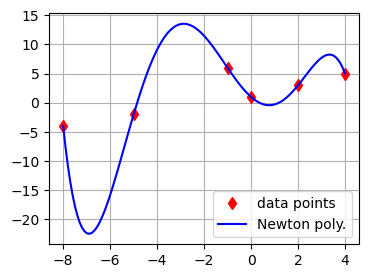

In [8]:
# Plotting the result

plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")

plt.grid()

plt.legend()
plt.show()

### Lagrange Interpolation : 

In [9]:
#Using the sp.interpolate.lagrange() function:
lagrange_polynomial = sp.interpolate.lagrange(x,y)

#checking values:
print(lagrange_polynomial)

          5           4          3         2
-0.01391 x - 0.09841 x + 0.4119 x + 1.953 x - 3.544 x + 1


In [10]:
print(Polynomial(lagrange_polynomial.coef[::-1]).coef)

[ 1.         -3.54351852  1.95287698  0.41188823 -0.0984127  -0.01390542]


In [11]:
#Get the y vector: 
y_new2 = Polynomial(lagrange_polynomial.coef[::-1])(x_new1)

#print(y_new2)

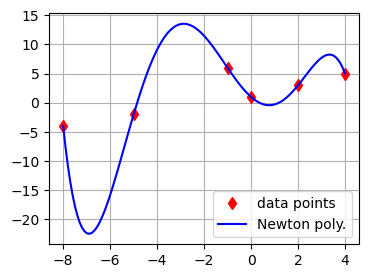

In [12]:
# Plotting the result

plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new2, color = "blue", linestyle = "-"\
        , label ="Newton poly.")

plt.grid()

plt.legend()
plt.show()

### Point to point interpolation

In [13]:
# call interp.interp1d function 
f_linear = sp.interpolate.interp1d(x,y,kind='linear') 

#print(f_linear)

# Get the actial values: 
#print(f_linear(x_new1))

y_new3 = f_linear(x_new1)

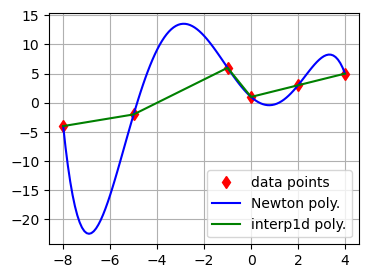

In [14]:
plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new2, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, f_linear(x_new1), color = "green", linestyle = "-"\
        , label ="interp1d poly.")

plt.grid()

plt.legend()
plt.show()

In [15]:
f_cuadratic = f_linear = sp.interpolate.interp1d(x,y,kind='quadratic') 

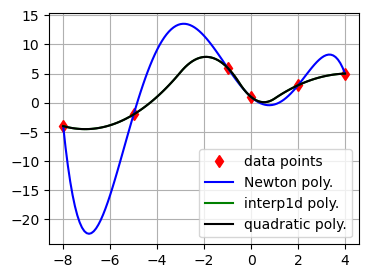

In [16]:
plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new2, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, f_linear(x_new1), color = "green", linestyle = "-"\
        , label ="interp1d poly.")
plt.plot(x_new1, f_cuadratic(x_new1), color = "black", linestyle = "-"\
        , label ="quadratic poly.")


plt.grid()

plt.legend()
plt.show()

### Using splrep() and splev() functions

In [17]:
#first we cal spirep: 

tck = sp.interpolate.splrep(x,y,s=0,k=3)

print(tck[0]) # knots
print(tck[1]) # coefs
print(tck[2]) # degree 

[-8. -8. -8. -8. -1.  0.  4.  4.  4.  4.]
[ -4.         -16.30684444  20.91352381  -7.16540952   9.77693968
   5.           0.           0.           0.           0.        ]
3


In [18]:
#call splev() functions to ge the polynomials: 

y_new5 = sp.interpolate.splev(x_new1,tck,der = 0 )

print(x_new1.shape,y_new5.shape)

(121,) (121,)


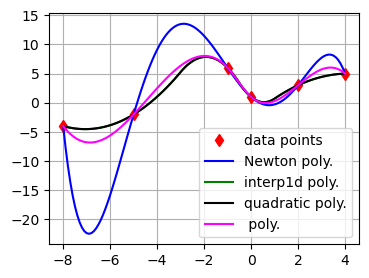

In [19]:
plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new2, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, f_linear(x_new1), color = "green", linestyle = "-"\
        , label ="interp1d poly.")
plt.plot(x_new1, f_cuadratic(x_new1), color = "black", linestyle = "-"\
        , label ="quadratic poly.")
plt.plot(x_new1, y_new5, color = "magenta", linestyle = "-"\
        , label =" poly.")


plt.grid()

plt.legend()
plt.show()

## EXAMPLE

In [20]:
import pandas as pd

In [21]:
data_temp = pd.read_csv('/home/jdiego/Documents/Computacional_1/temperature_data.csv')

month = np.array(data_temp["Month"])
temp = np.array(data_temp["Mean_temperature(C)"])

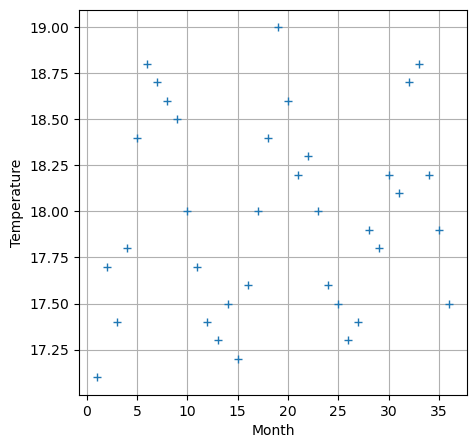

In [22]:
plt.figure(figsize = (5,5))

plt.plot(month,temp,marker = '+',linestyle = ' ')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

plt.show()

In [23]:
# we want to use interpolation to fill up the mising points in the plot. We want to smooth the plot. 

#USING THE FIRST INTER1D: 

f_interp1 = interp.interp1d(month,temp,kind= 'linear')
f_interp2 = interp.interp1d(month,temp,kind= 'cubic')
f_interp3 = interp.interp1d(month,temp,kind= 'nearest')
f_interp4 = interp.interp1d(month,temp,kind= 'previous')
f_interp5 = interp.interp1d(month,temp,kind= 'next')

#evaluating: 

month_new = np.arange(1,36.5,0.5)
#print(month_new)


temp1 = f_interp1(month_new)
temp2 = f_interp2(month_new)
temp3 = f_interp3(month_new)
temp4 = f_interp4(month_new)
temp5 = f_interp5(month_new)

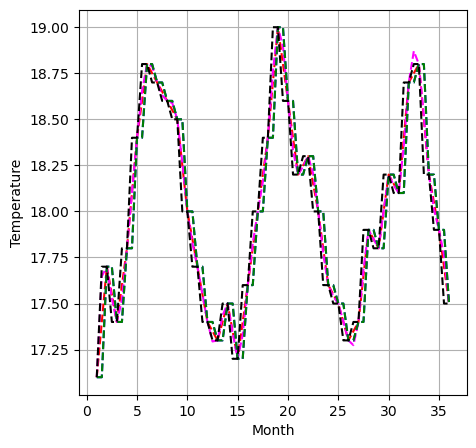

In [24]:
plt.figure(figsize = (5,5))

#plt.plot(month,temp,marker = '+',linestyle = ' ')
plt.plot(month_new,temp1,color = 'red',linestyle = '--')
plt.plot(month_new,temp2,color = 'magenta',linestyle = '--')
plt.plot(month_new,temp3,color = 'blue',linestyle = '--')
plt.plot(month_new,temp4,color = 'green',linestyle = '--')
plt.plot(month_new,temp5,color = 'black',linestyle = '--')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

plt.show()

In [25]:
# Using splrep and splev: 

#getting the tck object

tck = interp.splrep(month,temp,s=0,k=3)

#evalauting: 
temp1 = sp.interpolate.splev(month_new,tck,der = 0 )


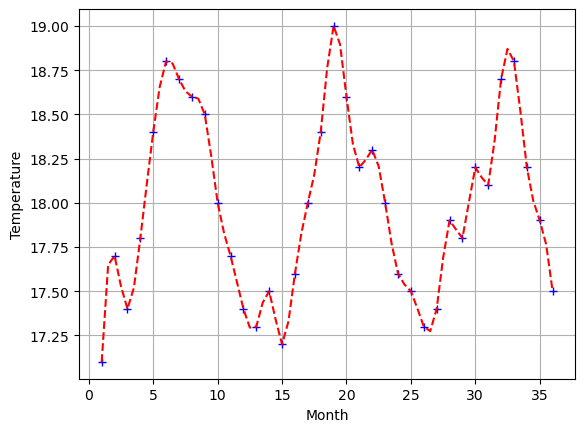

In [26]:
plt.plot(month,temp,color = 'blue',marker = '+',linestyle = ' ')
plt.plot(month_new,temp1,color = 'red',linestyle = '--')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

plt.show()

### Filling the missig data:

In [27]:
data_temp = pd.read_csv('/home/jdiego/Documents/Computacional_1/temperature_data_missing.csv')

In [28]:
month_missing = np.array(data_temp["Month"])
temp_missing = np.array(data_temp["Mean_temperature(C)"])

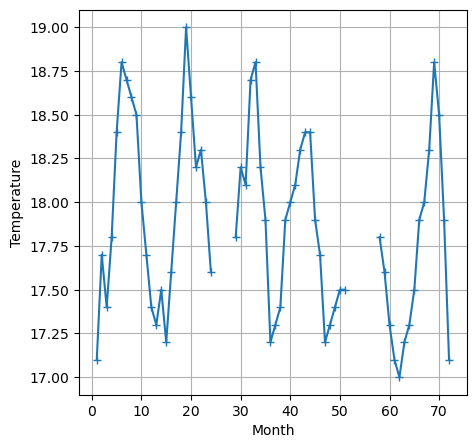

In [29]:
plt.figure(figsize = (5,5))

plt.plot(month_missing,temp_missing,marker = '+',linestyle = '-')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

plt.show()

In [30]:
f_interp1_missing = interp.interp1d(month_missing,temp_missing,kind= 'linear')

In [31]:
month_new_missing = np.arange(1,36.5,0.5)
#print(month_new)


temp1_missing = f_interp1_missing(month_new_missing)

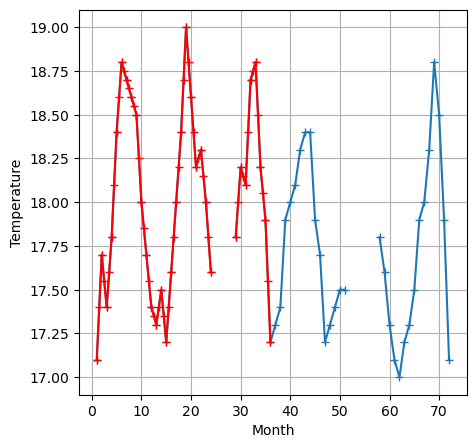

In [32]:
plt.figure(figsize = (5,5))

plt.plot(month_missing,temp_missing,marker = '+',linestyle = '-')
plt.plot(month_new_missing,temp1_missing,marker = '+',linestyle = '-',color='red')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

plt.show()

In [45]:
# Mean values:
mean_temp = np.mean(temp_missing)
std_temp  = np.std(temp_missing)
#print(mean_temp, std_temp)

# Mean values:
mean_temp = np.nanmean(temp_missing)   #nanmean ()Compute the mean along the specified axis, ignoring NaNs.
std_temp  = np.nanstd(temp_missing)

print(mean_temp, std_temp)

17.875806451612902 0.5238460386568187


In [37]:

# Get indices for all the finite values

idx_finite = np.isfinite(temp_missing)

print(idx_finite)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [39]:
month_nonan = month_missing[idx_finite] 
temp_nonan = temp_missing[idx_finite]

print(temp_missing)
print(temp_nonan.shape)

print(month_nonan)

[17.1 17.7 17.4 17.8 18.4 18.8 18.7 18.6 18.5 18.  17.7 17.4 17.3 17.5
 17.2 17.6 18.  18.4 19.  18.6 18.2 18.3 18.  17.6  nan  nan  nan  nan
 17.8 18.2 18.1 18.7 18.8 18.2 17.9 17.2 17.3 17.4 17.9 18.  18.1 18.3
 18.4 18.4 17.9 17.7 17.2 17.3 17.4 17.5 17.5  nan  nan  nan  nan  nan
  nan 17.8 17.6 17.3 17.1 17.  17.2 17.3 17.5 17.9 18.  18.3 18.8 18.5
 17.9 17.1]
(62,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 58
 59 60 61 62 63 64 65 66 67 68 69 70 71 72]


In [41]:
# Interpolaton functions
f_interp_nonan_linear = interp.interp1d(month_nonan, temp_nonan\
                                 , kind = "linear")
f_interp_nonan_cubic = interp.interp1d(month_nonan, temp_nonan\
                                 , kind = "cubic")

# New axis:

month_nonan_new = np.arange(1, 72.25, 0.25)

# Evaluate 
tempe_nonan_linear = f_interp_nonan_linear(month_nonan_new)
tempe_nonan_cubic = f_interp_nonan_cubic(month_nonan_new)

print(tempe_nonan_linear.shape)

(285,)


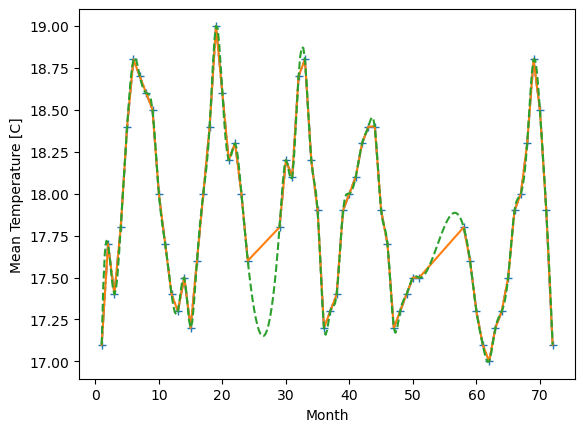

In [44]:
# Plotting the result:

plt.figure()

plt.plot(month_missing, temp_missing, marker = "+", linestyle = "-.")
plt.plot(month_nonan_new, tempe_nonan_linear, linestyle = "-")
plt.plot(month_nonan_new, tempe_nonan_cubic, linestyle = "--")

plt.xlabel("Month")
plt.ylabel("Mean Temperature [C]")

plt.show()

In [ ]:
#we have to remove the Nan values: 
tck_nonan = 